Clone git to get output.csv (cleaned dataset) or upload Dataset (ChatGPT.csv) and run below code to generate output.csv 

In [15]:
!git clone https://github.com/r1shabhpahwa/SNA_Project.git

fatal: destination path 'SNA_Project' already exists and is not an empty directory.


# Note: Skip this part if cloned from git

This code reads data from a CSV file named 'ChatGPT.csv', extracts specific columns (namely 'Date', 'Tweet', and 'Location'), and writes the extracted data to another CSV file named 'output.csv'.

In [132]:
import csv

# Input and output file paths
input_file = 'ChatGPT.csv'
output_file = 'SNA_Project/output.csv'

# Read the input file and extract the required columns
rows = []
with open(input_file, 'r', encoding='utf-8') as f:
    csvreader = csv.DictReader(f)
    for row in csvreader:
        try:
            date = row['Date']
            url = row['Url']
            user = row['User']
            city, country = row['Location'].split(',')
            rows.append({
                'Date': date,
                'Tweet': row['Tweet'],
                'City': city.strip(),
                'Country': country.strip(),
                'Url': url,
                'User': user
            })
        except (ValueError, KeyError):
            pass

# Write the extracted data to the output file
with open(output_file, 'w', newline='', encoding='utf-8') as f:
    fieldnames = ['Date', 'Tweet', 'City', 'Country', 'Url', 'User']
    csvwriter = csv.DictWriter(f, fieldnames=fieldnames)
    csvwriter.writeheader()
    for row in rows:
        csvwriter.writerow(row)

We then read the CSV file called "output.csv" and split the data into separate CSV files based on the continent of the country in each row. If the country is not found in the continent list, the row is written to a "missing.csv" file. The script uses the csv module to read and write the CSV files.

In [25]:
import csv

continents = {
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste (East Timor)', 'Turkey', 'Turkmenistan', 'United Arab Emirates (UAE)', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic (CAR)', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cote d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (formerly Swaziland)', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia (formerly Macedonia)', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom (UK)', 'Vatican City (Holy See)'],
    'North America': ['US','United States of America', 'USA','Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba','Mexico'],
    'South America':['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela'],
    'Oceania':['Fiji','Kiribati','Marshall Islands', 'Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu','Australia']
    }

continents_files = {continent: open(f'{continent}.csv', 'w', newline='', encoding='utf-8') for continent in continents}
missing_file = open('missing.csv', 'w', newline='', encoding='utf-8')

csvwriter_dict = {}
for continent, file in continents_files.items():
    csvwriter_dict[continent] = csv.DictWriter(file, fieldnames=['Date', 'Tweet', 'City', 'Country', 'Url', 'User'])
    csvwriter_dict[continent].writeheader()

csvwriter_missing = csv.DictWriter(missing_file, fieldnames=['Date', 'Tweet', 'City', 'Country','Url', 'User'])
csvwriter_missing.writeheader()

with open('SNA_Project/output.csv', 'r', encoding='utf-8') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        try:
            date, city, country, user, url = row['Date'], row['City'], row['Country'], row['User'], row['Url']
            continent = None
            for cont, countries in continents.items():
                if country in countries:
                    continent = cont
                    break
            if continent is None:
                raise ValueError(f'No continent found for country {country}')
            csvwriter_dict[continent].writerow({'Date': date, 'Tweet': row['Tweet'], 'City': city, 'Country': country, 'Url': url, 'User': user})
        except (KeyError, ValueError):
            csvwriter_missing.writerow({'Date': row.get('Date', 'N/A'), 'Tweet': row['Tweet'], 'City': row.get('City', 'N/A'), 'Country': row.get('Country', 'N/A'), 'Url': row.get('Url', 'N/A'), 'User': row.get('User', 'N/A')})

for file in continents_files.values():
    file.close()

missing_file.close()

This code defines a function called calculate_monthly_sentiment that reads a CSV file containing tweets, extracts the month from the 'Date' column, removes URLs, mentions, and hashtags from the tweets, calculates the sentiment score for each tweet using TextBlob, and then calculates the average sentiment score for each month. The function returns a Pandas Series object containing the monthly sentiment scores.

The function is executed for all the continents ie. Africa, Asia, Europe, North America, Oceania, and South America and the results are printed. 


In [26]:
import pandas as pd
from textblob import TextBlob

def calculate_monthly_sentiment(filename):
    # Load CSV file
    df = pd.read_csv(filename)

    # Convert 'Date' column to a datetime object and extract month
    df['month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

    # Clean up tweets by removing URLs, mentions, and hashtags
    df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)

    # Calculate sentiment score for each tweet
    df['sentiment'] = df['clean_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

    # Calculate overall sentiment score for each month
    monthly_sentiment = df.groupby('month')['sentiment'].mean()

    return monthly_sentiment

# Calculate monthly sentiment scores for Europe.csv and Asia.csv
africa_sentiment = calculate_monthly_sentiment('Africa.csv')
asia_sentiment = calculate_monthly_sentiment('Asia.csv')
europe_sentiment = calculate_monthly_sentiment('Europe.csv')
northAmerica_sentiment = calculate_monthly_sentiment('North America.csv')
oceania_sentiment = calculate_monthly_sentiment('Oceania.csv')
southAmerica_sentiment = calculate_monthly_sentiment('South America.csv')

# Print the results
print("\nAfrica monthly sentiment:")
print(africa_sentiment)

print("\nAsia monthly sentiment:")
print(asia_sentiment)

print("\nEurope monthly sentiment:")
print(europe_sentiment)

print("\nNorth America monthly sentiment:")
print(northAmerica_sentiment)

print("\nOceania monthly sentiment:")
print(oceania_sentiment)

print("\nSouth America monthly sentiment:")
print(southAmerica_sentiment)



<ipython-input-26-9e3d818fe363>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-26-9e3d818fe363>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-26-9e3d818fe363>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-26-9e3d818fe363>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-26-9e3d818fe363>:12: FutureWarning: The default value of regex will change from True to False in a fu


Africa monthly sentiment:
month
2022-11    0.356250
2022-12    0.117766
2023-01    0.139794
2023-02    0.136774
Name: sentiment, dtype: float64

Asia monthly sentiment:
month
2022-11    0.500000
2022-12    0.133294
2023-01    0.118733
2023-02    0.126102
Name: sentiment, dtype: float64

Europe monthly sentiment:
month
2022-11   -0.032622
2022-12    0.141052
2023-01    0.121348
2023-02    0.119388
Name: sentiment, dtype: float64

North America monthly sentiment:
month
2022-11    0.200313
2022-12    0.144612
2023-01    0.126925
2023-02    0.125068
Name: sentiment, dtype: float64

Oceania monthly sentiment:
month
2022-12    0.117061
2023-01    0.138035
2023-02    0.116454
Name: sentiment, dtype: float64

South America monthly sentiment:
month
2022-11    0.190909
2022-12    0.183290
2023-01    0.149164
2023-02    0.101083
Name: sentiment, dtype: float64


<ipython-input-26-9e3d818fe363>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)


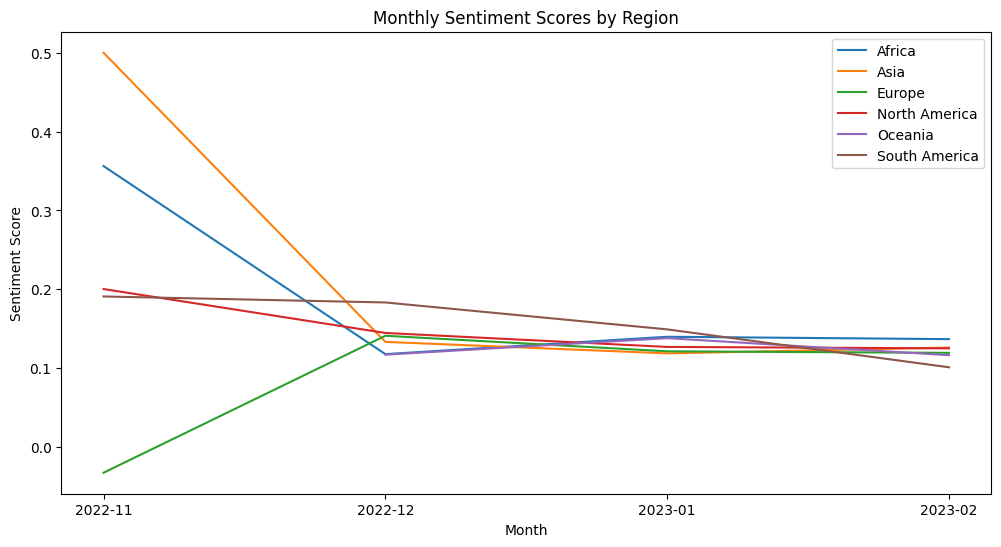

In [27]:
import matplotlib.pyplot as plt

# Concatenate all sentiment scores into a single dataframe
sentiment_df = pd.concat([africa_sentiment, asia_sentiment, europe_sentiment, northAmerica_sentiment, oceania_sentiment, southAmerica_sentiment], axis=1)
sentiment_df.columns = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# Plot the sentiment scores for each region
plt.figure(figsize=(12,6))
plt.plot(sentiment_df.index, sentiment_df['Africa'], label='Africa')
plt.plot(sentiment_df.index, sentiment_df['Asia'], label='Asia')
plt.plot(sentiment_df.index, sentiment_df['Europe'], label='Europe')
plt.plot(sentiment_df.index, sentiment_df['North America'], label='North America')
plt.plot(sentiment_df.index, sentiment_df['Oceania'], label='Oceania')
plt.plot(sentiment_df.index, sentiment_df['South America'], label='South America')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Monthly Sentiment Scores by Region')
plt.legend()
plt.show()


Install country_converter library

In [28]:
pip install country_converter
pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 KB 3.8 MB/s eta 0:00:00


In [29]:
import pandas as pd
from textblob import TextBlob
import country_converter as coco
import plotly.express as px

def calculate_monthly_sentiment(filename):
    # Load CSV file
    df = pd.read_csv(filename)

    # Convert 'Date' column to a datetime object and extract month
    df['month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

    # Clean up tweets by removing URLs, mentions, and hashtags
    df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)

    # Calculate sentiment score for each tweet
    df['sentiment'] = df['clean_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

    # Convert country names to continent names
    df['continent'] = coco.convert(names=df['Country'], to='Continent')

    # Add column with 3-letter ISO codes
    df['iso_alpha'] = coco.convert(names=df['Country'], to='ISO3')

    # Calculate overall sentiment score for each month and continent
    monthly_sentiment = df.groupby(['continent', 'month', 'iso_alpha'])['sentiment'].mean().reset_index()

    return monthly_sentiment

# Calculate monthly sentiment scores for each continent
africa_sentiment = calculate_monthly_sentiment('Africa.csv')
asia_sentiment = calculate_monthly_sentiment('Asia.csv')
europe_sentiment = calculate_monthly_sentiment('Europe.csv')
northAmerica_sentiment = calculate_monthly_sentiment('North America.csv')
oceania_sentiment = calculate_monthly_sentiment('Oceania.csv')
southAmerica_sentiment = calculate_monthly_sentiment('South America.csv')

# Combine sentiment scores for all continents into one dataframe
all_sentiment = pd.concat([africa_sentiment, asia_sentiment, europe_sentiment, 
                           northAmerica_sentiment, oceania_sentiment, southAmerica_sentiment])

# Plot sentiment scores on a world map
fig = px.choropleth(all_sentiment, locations='iso_alpha', locationmode='ISO-3',
                    color='sentiment', animation_frame='month', projection='natural earth')
fig.show()


<ipython-input-29-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-29-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-29-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-29-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['Tweet'].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
<ipython-input-29-014530a1a8ef>:14: FutureWarning: The default value of regex will change from True to False in a fu

In [30]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This code uses the pandas library to load the 5 continenetscsv file into a DataFrame, then uses the apply method to perform sentiment analysis on each tweet using TextBlob's sentiment.polarity method. The resulting sentiment scores are stored in a new "Sentiment" column in the DataFrame.

In [31]:
import pandas as pd
import re
from textblob import TextBlob

# Function to clean tweets
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove the word "ChatGPT"
    tweet = re.sub(r'ChatGPT', '', tweet, flags=re.IGNORECASE)
    return tweet.strip()

# Load the csv file into a pandas DataFrame
with open("/content/Asia.csv") as file:
    tweets1 = pd.read_csv(file)

# Clean Tweets
tweets1["Tweet"] = tweets1["Tweet"].apply(clean_tweet)
# Perform sentiment analysis on each tweet and add a "Sentiment" column to the DataFrame
tweets1["Sentiment"] = tweets1["Tweet"].apply(lambda tweet1: TextBlob(tweet1).sentiment.polarity)
# Write the updated DataFrame back to the original CSV file
with open("/content/Asia.csv", "w") as file:
    tweets1.to_csv(file, index=False)
# Print the first few rows of the DataFrame to verify the sentiment analysis has been added as a column
print(tweets1.head())

with open("/content/Africa.csv") as file:
    tweets2 = pd.read_csv(file)
tweets2["Tweet"] = tweets2["Tweet"].apply(clean_tweet)
tweets2["Sentiment"] = tweets2["Tweet"].apply(lambda tweet2: TextBlob(tweet2).sentiment.polarity)
with open("/content/Africa.csv", "w") as file:
    tweets2.to_csv(file, index=False)
print(tweets2.head())

with open("/content/Europe.csv") as file:
    tweets3 = pd.read_csv(file)
tweets3["Tweet"] = tweets3["Tweet"].apply(clean_tweet)
tweets3["Sentiment"] = tweets3["Tweet"].apply(lambda tweet3: TextBlob(tweet3).sentiment.polarity)
with open("/content/Europe.csv", "w") as file:
    tweets3.to_csv(file, index=False)
print(tweets3.head())

with open("/content/North America.csv") as file:
    tweets4 = pd.read_csv(file)
tweets4["Tweet"] = tweets4["Tweet"].apply(clean_tweet)
tweets4["Sentiment"] = tweets4["Tweet"].apply(lambda tweet4: TextBlob(tweet4).sentiment.polarity)
with open("/content/North America.csv", "w") as file:
    tweets4.to_csv(file, index=False)
print(tweets4.head())

with open("/content/Oceania.csv") as file:
    tweets5 = pd.read_csv(file)
tweets5["Tweet"] = tweets5["Tweet"].apply(clean_tweet)
tweets5["Sentiment"] = tweets5["Tweet"].apply(lambda tweet5: TextBlob(tweet5).sentiment.polarity)
with open("/content/Oceania.csv", "w") as file:
    tweets5.to_csv(file, index=False)
print(tweets5.head())

with open("/content/South America.csv") as file:
    tweets = pd.read_csv(file)
tweets["Tweet"] = tweets["Tweet"].apply(clean_tweet)
tweets["Sentiment"] = tweets["Tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
with open("/content/South America.csv", "w") as file:
    tweets.to_csv(file, index=False)
print(tweets.head())


                        Date  \
0  2023-02-24 07:59:26+00:00   
1  2023-02-24 07:55:54+00:00   
2  2023-02-24 07:53:01+00:00   
3  2023-02-24 07:43:22+00:00   
4  2023-02-24 07:42:23+00:00   

                                               Tweet       City   Country  \
0  How to hire 100x more productive team members ...  New Delhi     India   
1  China will continue to give strong support to ...    Beijing     China   
2  This #malware steals social media credentials ...  Bangalore     India   
3                            CHAT GPT IS LOVEEE ❤\n#     Punjab  Pakistan   
4    How do I make an HTTP request in Javascript?\n#    Karachi  Pakistan   

                                                 Url             User  \
0  https://twitter.com/smnishad/status/1629028212...         smnishad   
1  https://twitter.com/globaltimesnews/status/162...  globaltimesnews   
2  https://twitter.com/bamitav/status/16290265962...          bamitav   
3  https://twitter.com/bilal_zhd/status/162902417...

# Generating Words Cloud for tweets for each continent

In [32]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a given DataFrame of tweets
def generate_wordcloud(tweets, title):
  # Perform sentiment analysis on each tweet and add a "Sentiment" column to the DataFrame
  tweets["Sentiment"] = tweets["Tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
  # Categorize tweets as positive or negative based on their sentiment score
  tweets["Sentiment Category"] = tweets["Sentiment"].apply(lambda sentiment: "Positive" if sentiment >= 0 else "Negative")
  # Join all the tweets into a single string for each sentiment category
  positive_tweets = " ".join(tweets[tweets["Sentiment Category"] == "Positive"]["Tweet"])
  negative_tweets = " ".join(tweets[tweets["Sentiment Category"] == "Negative"]["Tweet"])
  # Generate word clouds for positive and negative tweets
  positive_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(positive_tweets)
  negative_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(negative_tweets)
  # Plot the word clouds
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))
  axs[0].imshow(positive_wordcloud, interpolation='bilinear')
  axs[0].set_title("Positive Tweets")
  axs[0].axis('off')
  axs[1].imshow(negative_wordcloud, interpolation='bilinear')
  axs[1].set_title("Negative Tweets")
  axs[1].axis('off')
  fig.suptitle(title, fontsize=16)
  plt.show()

# Load the tweets from each CSV file and generate a word cloud for each region
regions = ["/content/Asia.csv", "/content/Africa.csv", "/content/Europe.csv", "/content/North America.csv", "/content/Oceania.csv", "/content/South America.csv"]
for region in regions:
  tweets = pd.read_csv(region)
  title = f"Word Cloud Analysis for {region.split('/')[-1].split('.')[0]}"
  generate_wordcloud(tweets, title)


Output hidden; open in https://colab.research.google.com to view.

# **Social Network Analysis**

We create a network graph of the most influential users and how they are connected through mentions and replies in the tweets. 

Each node in the graph represents a user, and the edges represent mentions/replies between the users.

This visualization can provide valuable insights into the structure of the conversation and the key players involved.

In [128]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

df = pd.read_csv('SNA_Project/output.csv', nrows=30000)
G = nx.DiGraph()

users = set(df['User'])

for user in users:
    G.add_node(user)

for _, row in df.iterrows():
    tweet = row['Tweet']
    mentions = [user for user in users if user in tweet]
    for user1 in mentions:
        for user2 in mentions:
            if user1 != user2:
                G.add_edge(user1, user2)

Removing nodes which have no edges to simplify the results

In [129]:
# Remove nodes with no edges
to_remove = [node for node, degree in dict(G.degree()).items() if degree == 0 ]
G.remove_nodes_from(to_remove)

Generating the visualization of the network/graph

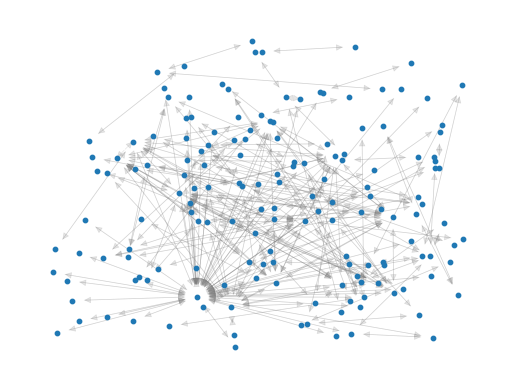

In [130]:
pos = nx.spring_layout(G, iterations=1)
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='grey', width=0.5)
plt.axis('off')
plt.show()

Applying Edge Bundling technique to make the graph more useful is by bundling the edges together based on their similarity. This technique can be used to reduce the number of overlapping edges while still maintaining the overall structure of the graph.

In [133]:
# Apply edge bundling
NT = Network(notebook=True, width='100%', height='800px', cdn_resources='remote')
NT.from_nx(G)
NT.show('graph.html')

graph.html


Calculating different centrality measures to identify influencial users

In [123]:
# Calculate centrality measures
eig_centrality = nx.eigenvector_centrality(G)
deg_centrality = nx.degree_centrality(G)
bet_centrality = nx.betweenness_centrality(G)

# Print top 10 most central nodes based on eigenvector centrality
print("Top 10 most central nodes based on eigenvector centrality:")
sorted_eig = sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_eig[:10]:
    print(f"{node}: {score}")

# Print top 10 most central nodes based on degree centrality
print("\nTop 10 most central nodes based on degree centrality:")
sorted_deg = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_deg[:10]:
    print(f"{node}: {score}")

# Print top 10 most central nodes based on betweenness centrality
print("\nTop 10 most central nodes based on betweenness centrality:")
sorted_bet = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)
for node, score in sorted_bet[:10]:
    print(f"{node}: {score}")

Top 10 most central nodes based on eigenvector centrality:
om: 0.610879523027566
tor: 0.2679063992179927
soft: 0.14964848562720853
mvollmer1: 0.09248777503289224
HaroldSinnott: 0.08084144778693579
CurieuxExplorer: 0.07873095293009205
labordeolivier: 0.07596046819301948
psb_dc: 0.07586532904079286
AkwyZ: 0.07330636600100322
EvanKirstel: 0.07003914717332511

Top 10 most central nodes based on degree centrality:
om: 1.592989289191821
tor: 0.5744888023369036
soft: 0.29795520934761444
mvollmer1: 0.08179162609542356
SEO: 0.07010710808179163
HaroldSinnott: 0.062317429406037
jblefevre60: 0.06037000973709835
EvanKirstel: 0.06037000973709835
psb_dc: 0.05842259006815969
CurieuxExplorer: 0.05842259006815969

Top 10 most central nodes based on betweenness centrality:
om: 0.8334107286606414
tor: 0.17379688525829637
soft: 0.09233514243512346
nish: 0.018673039674105222
SEO: 0.015012570425283048
UL: 0.011464331304221847
tron: 0.009361676115162743
ultan: 0.006337090079609326
QF: 0.004999732527246882
Eva